In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 548D-A501

 Directory of C:\Users\DCL\Project\Face recognition

07/29/2021  12:43 PM    <DIR>          .
07/29/2021  12:43 PM    <DIR>          ..
07/29/2021  12:40 PM    <DIR>          .ipynb_checkpoints
07/29/2021  12:43 PM    <DIR>          data
07/27/2021  05:22 AM    <DIR>          freeai
07/28/2021  06:53 PM           278,500 Module-01-Object Detection(face).ipynb
07/27/2021  11:37 AM           233,688 Module-01-Resize.ipynb
07/27/2021  09:39 AM         1,742,656 Module-01-Understanding images.ipynb
07/27/2021  10:09 AM           114,760 Module-01-Values or Pixles.ipynb
07/29/2021  12:39 PM             1,983 Module-01-Videos.ipynb
07/29/2021  12:43 PM             3,239 Module-2 - Image Croping.ipynb
07/27/2021  05:12 AM                50 requirements.txt
               7 File(s)      2,374,876 bytes
               5 Dir(s)  30,022,291,456 bytes free


In [10]:
ls data

 Volume in drive C has no label.
 Volume Serial Number is 548D-A501

 Directory of C:\Users\DCL\Project\Face recognition\data

07/29/2021  12:43 PM    <DIR>          .
07/29/2021  12:43 PM    <DIR>          ..
07/29/2021  12:24 PM    <DIR>          female
07/28/2021  12:25 PM           930,127 haarcascade_frontalface_default.xml
07/29/2021  11:24 AM    <DIR>          male
07/28/2021  12:32 PM           235,849 male_000281.jpg
07/28/2021  05:22 PM         1,439,538 male_01.png
07/27/2021  05:32 AM            42,741 test.jpg
07/28/2021  06:42 PM        17,319,083 video.mp4
               5 File(s)     19,967,338 bytes
               4 Dir(s)  30,021,763,072 bytes free


In [14]:
ls data\\female

 Volume in drive C has no label.
 Volume Serial Number is 548D-A501

 Directory of C:\Users\DCL\Project\Face recognition\data\female

07/29/2021  12:24 PM    <DIR>          .
07/29/2021  12:24 PM    <DIR>          ..
07/29/2021  11:26 AM            34,963 female_000001.jpg
07/29/2021  11:26 AM            19,640 female_000002.jpg
07/29/2021  11:26 AM            48,777 female_000003.jpg
07/29/2021  11:26 AM            47,520 female_000004.jpg
07/29/2021  11:26 AM            59,810 female_000005.jpg
07/29/2021  11:26 AM            59,380 female_000006.jpg
07/29/2021  11:26 AM            25,291 female_000007.jpg
07/29/2021  11:26 AM            51,949 female_000008.jpg
07/29/2021  11:26 AM            33,388 female_000009.jpg
07/29/2021  11:26 AM            42,769 female_000010.jpg
07/29/2021  11:26 AM            40,026 female_000011.jpg
07/29/2021  11:26 AM            31,286 female_000012.jpg
07/29/2021  11:26 AM            22,392 female_0000120.jpg
07/29/2021  11:26 AM            50,876 fe

In [15]:
from glob import glob

In [16]:
femalepath = glob('./data/female/*.jpg')

In [17]:
femalepath

['./data/female\\female_000001.jpg',
 './data/female\\female_000002.jpg',
 './data/female\\female_000003.jpg',
 './data/female\\female_000004.jpg',
 './data/female\\female_000005.jpg',
 './data/female\\female_000006.jpg',
 './data/female\\female_000007.jpg',
 './data/female\\female_000008.jpg',
 './data/female\\female_000009.jpg',
 './data/female\\female_000010.jpg',
 './data/female\\female_000011.jpg',
 './data/female\\female_000012.jpg',
 './data/female\\female_0000120.jpg',
 './data/female\\female_000013.jpg',
 './data/female\\female_000014.jpg',
 './data/female\\female_000015.jpg',
 './data/female\\female_000016.jpg',
 './data/female\\female_000017.jpg',
 './data/female\\female_000018.jpg',
 './data/female\\female_000019.jpg',
 './data/female\\female_000020.jpg',
 './data/female\\female_000021.jpg',
 './data/female\\female_000022.jpg',
 './data/female\\female_000023.jpg',
 './data/female\\female_000024.jpg',
 './data/female\\female_000025.jpg',
 './data/female\\female_000026.jpg',


In [19]:
femalepath = glob('./data/female/*.jpg')
malepath = glob('./data/male/*.jpg')

In [24]:
len(femalepath), len(malepath)

(134, 108)

In [34]:
# let us consider one image
path = femalepath[0]
img = cv2.imread(path)

In [35]:
img.shape

(750, 500, 3)

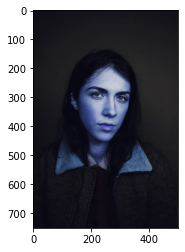

In [36]:
plt.imshow(img)
plt.show()

In [37]:
# convert image into grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(750, 500)

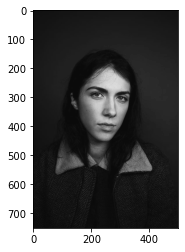

In [38]:
plt.imshow(gray,cmap='gray')

In [39]:
# load haar cascade classifier
haar = cv2.CascadeClassifier('./data/haarcascade_frontalface_default.xml')

In [40]:
faces = haar.detectMultiScale(gray,1.5,5)
print(faces)

[[175 224 182 182]
 [122 187 273 273]]


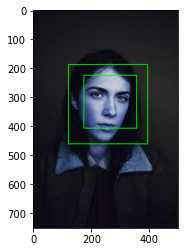

In [41]:
for x,y,w,h in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(img)

In [42]:
# crop the image
crop_img = img[y:y+h,x:x+h]

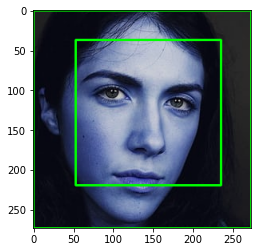

In [43]:
plt.imshow(crop_img)

In [44]:
# save the image
cv2.imwrite('f_01.png',crop_img)

True

In [45]:

# Apply to all the image
def extract_images(path,gender,i):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = haar.detectMultiScale(gray,1.5,5)
    for x,y,w,h in faces:
        roi = img[y:y+h,x:x+w]
        cv2.imwrite('{}_{}.png'.format(gender,i),roi)

In [46]:
extract_images(femalepath[0],'female',1)

In [48]:
# Apply to all the image
def extract_images(path,gender,i):
    img = cv2.imread(path)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = haar.detectMultiScale(gray,1.5,5)
    for x,y,w,h in faces:
        roi = img[y:y+h,x:x+w]
        if gender == 'male':
            
            cv2.imwrite('./data/crop/male_crop/{}_{}.png'.format(gender,i),roi)
        else:
            cv2.imwrite('./data/crop/female_crop/{}_{}.png'.format(gender,i),roi)
            

In [49]:
extract_images(femalepath[0],'female',1)

In [53]:
for i,path in enumerate(femalepath):
    try:
        
        extract_images(path,'female',i)
        print('INFO: {}/{} processed sucessfully'.format(i,len(femalepath)))
    except:
        print('INFO: {}/{} cannot be processed'.format(i,len(femalepath)))

INFO: 0/134 processed sucessfully
INFO: 1/134 processed sucessfully
INFO: 2/134 processed sucessfully
INFO: 3/134 processed sucessfully
INFO: 4/134 processed sucessfully
INFO: 5/134 processed sucessfully
INFO: 6/134 processed sucessfully
INFO: 7/134 processed sucessfully
INFO: 8/134 processed sucessfully
INFO: 9/134 processed sucessfully
INFO: 10/134 processed sucessfully
INFO: 11/134 processed sucessfully
INFO: 12/134 processed sucessfully
INFO: 13/134 processed sucessfully
INFO: 14/134 processed sucessfully
INFO: 15/134 processed sucessfully
INFO: 16/134 processed sucessfully
INFO: 17/134 processed sucessfully
INFO: 18/134 processed sucessfully
INFO: 19/134 processed sucessfully
INFO: 20/134 processed sucessfully
INFO: 21/134 processed sucessfully
INFO: 22/134 processed sucessfully
INFO: 23/134 processed sucessfully
INFO: 24/134 processed sucessfully
INFO: 25/134 processed sucessfully
INFO: 26/134 processed sucessfully
INFO: 27/134 processed sucessfully
INFO: 28/134 processed sucessf

In [52]:
for i,path in enumerate(malepath):
    try:
        
        extract_images(path,'male',i)
        print('INFO: {}/{} processed sucessfully'.format(i,len(malepath)))
    except:
        print('INFO: {}/{} cannot be processed'.format(i,len(malepath)))

INFO: 0/108 processed sucessfully
INFO: 1/108 processed sucessfully
INFO: 2/108 processed sucessfully
INFO: 3/108 processed sucessfully
INFO: 4/108 processed sucessfully
INFO: 5/108 processed sucessfully
INFO: 6/108 processed sucessfully
INFO: 7/108 processed sucessfully
INFO: 8/108 processed sucessfully
INFO: 9/108 processed sucessfully
INFO: 10/108 processed sucessfully
INFO: 11/108 processed sucessfully
INFO: 12/108 processed sucessfully
INFO: 13/108 processed sucessfully
INFO: 14/108 processed sucessfully
INFO: 15/108 processed sucessfully
INFO: 16/108 processed sucessfully
INFO: 17/108 processed sucessfully
INFO: 18/108 processed sucessfully
INFO: 19/108 processed sucessfully
INFO: 20/108 processed sucessfully
INFO: 21/108 processed sucessfully
INFO: 22/108 processed sucessfully
INFO: 23/108 processed sucessfully
INFO: 24/108 processed sucessfully
INFO: 25/108 processed sucessfully
INFO: 26/108 processed sucessfully
INFO: 27/108 processed sucessfully
INFO: 28/108 processed sucessf